# Method Comparison

This notebook compares the effectiveness of scVI, scANVI, and SysVI for integration on our dataset to remove batch effects.

In [4]:
import scanpy as sc

In [7]:
# data source: # https://www.biorxiv.org/content/10.1101/2025.09.11.675724v1.full - PacBio long reads
# files paths 

CARMELLE_DATA_DIR = "/mnt/lareaulab/carmelle/longread_sc/lung"
AATH_DATA_DIR = "/Users/aathreyakadambi/Documents/school/berkeley/fa25/cs194/final_project/data"
AATH_LAMBDA_DATA_DIR = "/home/ubuntu/workspace/data"
DATA_DIR = AATH_LAMBDA_DATA_DIR

# integrated datasets
longbench_scvi_scanvi_gene_integrated = f"{DATA_DIR}/processed/sc_sn_gene_integration_longbench/post_scvi_scanvi_integrated.h5ad"
longbench_scvi_scanvi_isoform_integrated = f"{DATA_DIR}/processed/sc_sn_isoform_integration_longbench/post_scvi_scanvi_integrated.h5ad"

# TODO: in hindsight, storing these in different files is super inefficient.
longbench_sysvi_gene_integrated = f"{DATA_DIR}/processed/sysvi_sc_sn_gene_integration_longbench/post_sysvi_integrated.h5ad"
longbench_sysvi_isoform_integrated = f"{DATA_DIR}/processed/sysvi_sc_sn_isoform_integration_longbench/post_sysvi_integrated.h5ad"

In [8]:
genes_combined = sc.read_h5ad(longbench_scvi_scanvi_gene_integrated)
isoforms_combined = sc.read_h5ad(longbench_scvi_scanvi_isoform_integrated)

/home/ubuntu/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## scVI

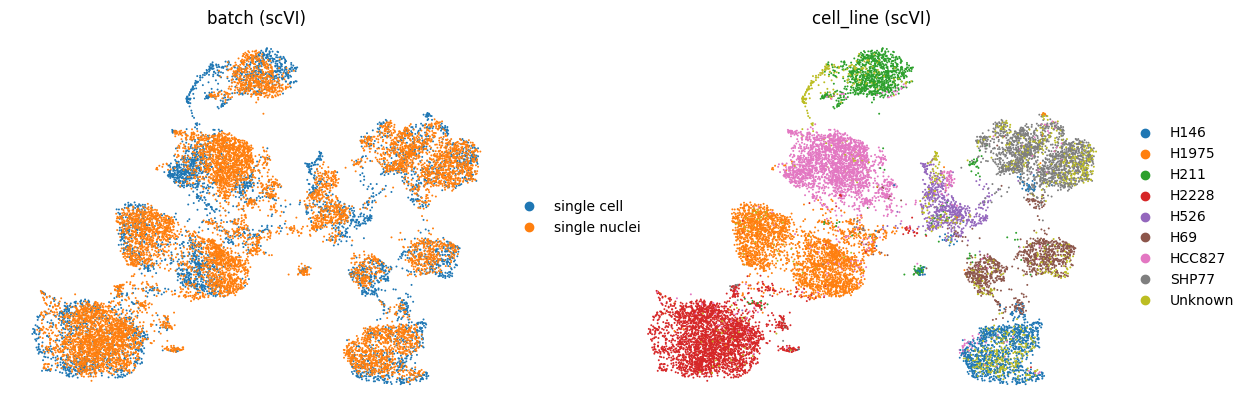

In [12]:
sc.pp.neighbors(genes_combined, use_rep="X_scVI")
sc.tl.umap(genes_combined, key_added="X_scVI_umap")
# sc.pl.umap by default looks for 'X_umap', so specify basis (from Cursor AI)
sc.pl.embedding(
    genes_combined, 
    basis="X_scVI_umap", 
    color=['batch', 'cell_line'], 
    frameon=False, 
    ncols=2,
    title=["batch (scVI)", "cell_line (scVI)"]
)

## scANVI

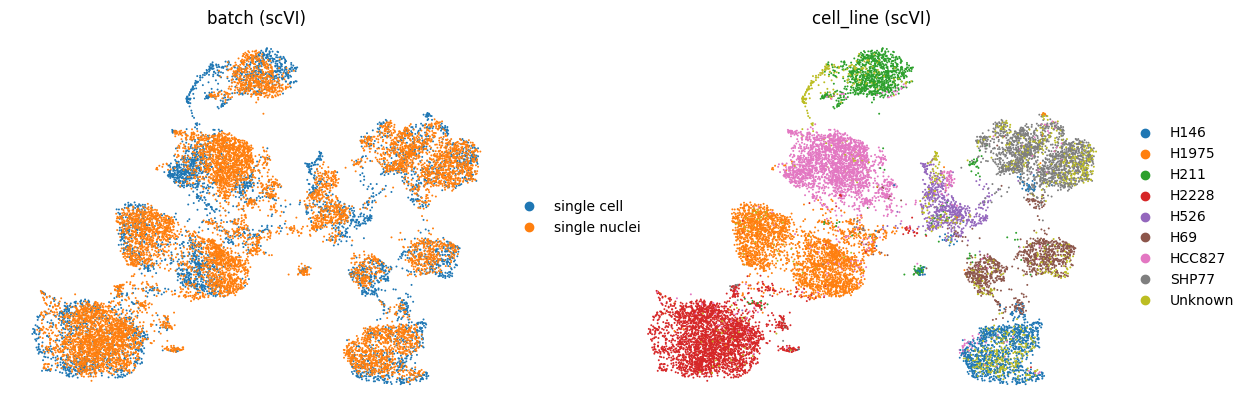

In [ ]:
sc.pp.neighbors(genes_combined, use_rep="X_scANVI")
sc.tl.umap(genes_combined, key_added="X_scANVI_umap")
# sc.pl.umap by default looks for 'X_umap', so specify basis (from Cursor AI)
sc.pl.embedding(
    genes_combined, 
    basis="X_scANVI_umap", 
    color=['batch', 'cell_line'], 
    frameon=False, 
    ncols=2,
    title=["batch (scVI)", "cell_line (scANVI)"]
)

## SysVI

In [14]:
genes_combined = sc.read_h5ad(longbench_sysvi_gene_integrated)
isoforms_combined = sc.read_h5ad(longbench_sysvi_isoform_integrated)

/home/ubuntu/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


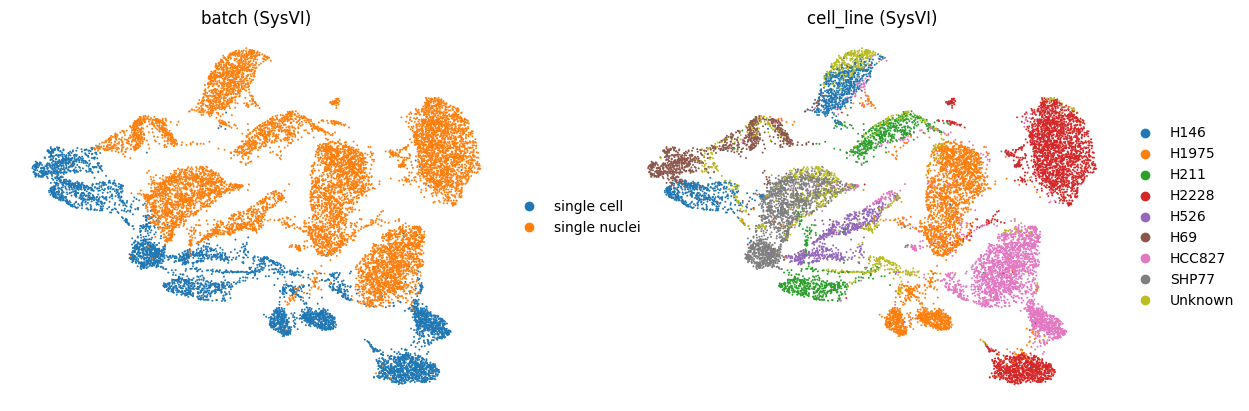

In [17]:
sc.pp.neighbors(genes_combined, use_rep="X_sysVI")
sc.tl.umap(genes_combined, key_added="X_sysVI_umap")
# sc.pl.umap by default looks for 'X_umap', so specify basis (from Cursor AI)
sc.pl.embedding(
    genes_combined, 
    basis="X_sysVI_umap", 
    color=['batch', 'cell_line'], 
    frameon=False, 
    ncols=2,
    title=["batch (SysVI)", "cell_line (SysVI)"]
)